 ### PART II Data Modeling

- Check for collinearity among the features
- Visualize relationship between each predictor and price
- Visualize the target variable to identify any skewness and any necessary transformations
- Visualize the supply of Airbnb homes by location

In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [47]:
df = pd.read_csv('clean_df.csv')

In [49]:
df.head().T

,0,1,2,3,4
id,2.009178e+07,3.710661e+06,1.505524e+07,1.964091e+07,1.188895e+07
host_response_rate,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e-01
accommodates,-1.023974e+00,-4.835510e-01,-4.835510e-01,-4.835510e-01,-4.835510e-01
bathrooms,-3.160492e-01,-3.160492e-01,9.238628e-01,-3.160492e-01,-3.160492e-01
bedrooms,-2.207173e-01,-2.207173e-01,-2.207173e-01,-2.207173e-01,-2.207173e-01
beds,-5.478095e-01,-5.478095e-01,-5.478095e-01,-5.478095e-01,-5.478095e-01
price,4.500000e+01,9.500000e+01,6.000000e+01,7.000000e+01,1.040000e+02
security_deposit,-6.660932e-01,-6.660932e-01,-6.660932e-01,-6.660932e-01,-6.660932e-01
cleaning_fee,-1.005529e+00,6.981248e-02,-3.603242e-01,-5.753926e-01,2.848808e-01
minimum_nights,-2.823764e-01,-1.848678e-01,2.051666e-01,-1.848678e-01,7.902183e-01


In [50]:
abs(df.corr())['price'].sort_values(ascending = False)

price                              1.000000
price_log                          0.894333
accommodates                       0.580604
cleaning_fee                       0.560634
room_type_Entire home/apt          0.526874
room_type_Private room             0.495235
beds                               0.490235
bedrooms                           0.452257
bathrooms                          0.283511
am_Family/kid friendly             0.275229
security_deposit                   0.240145
am_TV                              0.236052
am_Cable TV                        0.235758
am_Dryer                           0.189401
am_Washer                          0.184806
am_Air conditioning                0.177319
cancellation_policy_strict.1       0.159401
cancellation_policy_strict         0.159401
am_Dishwasher                      0.156770
review_scores_location             0.154240
am_Elevator                        0.148370
am_Doorman                         0.146720
am_Pack ’n Play/travel crib     

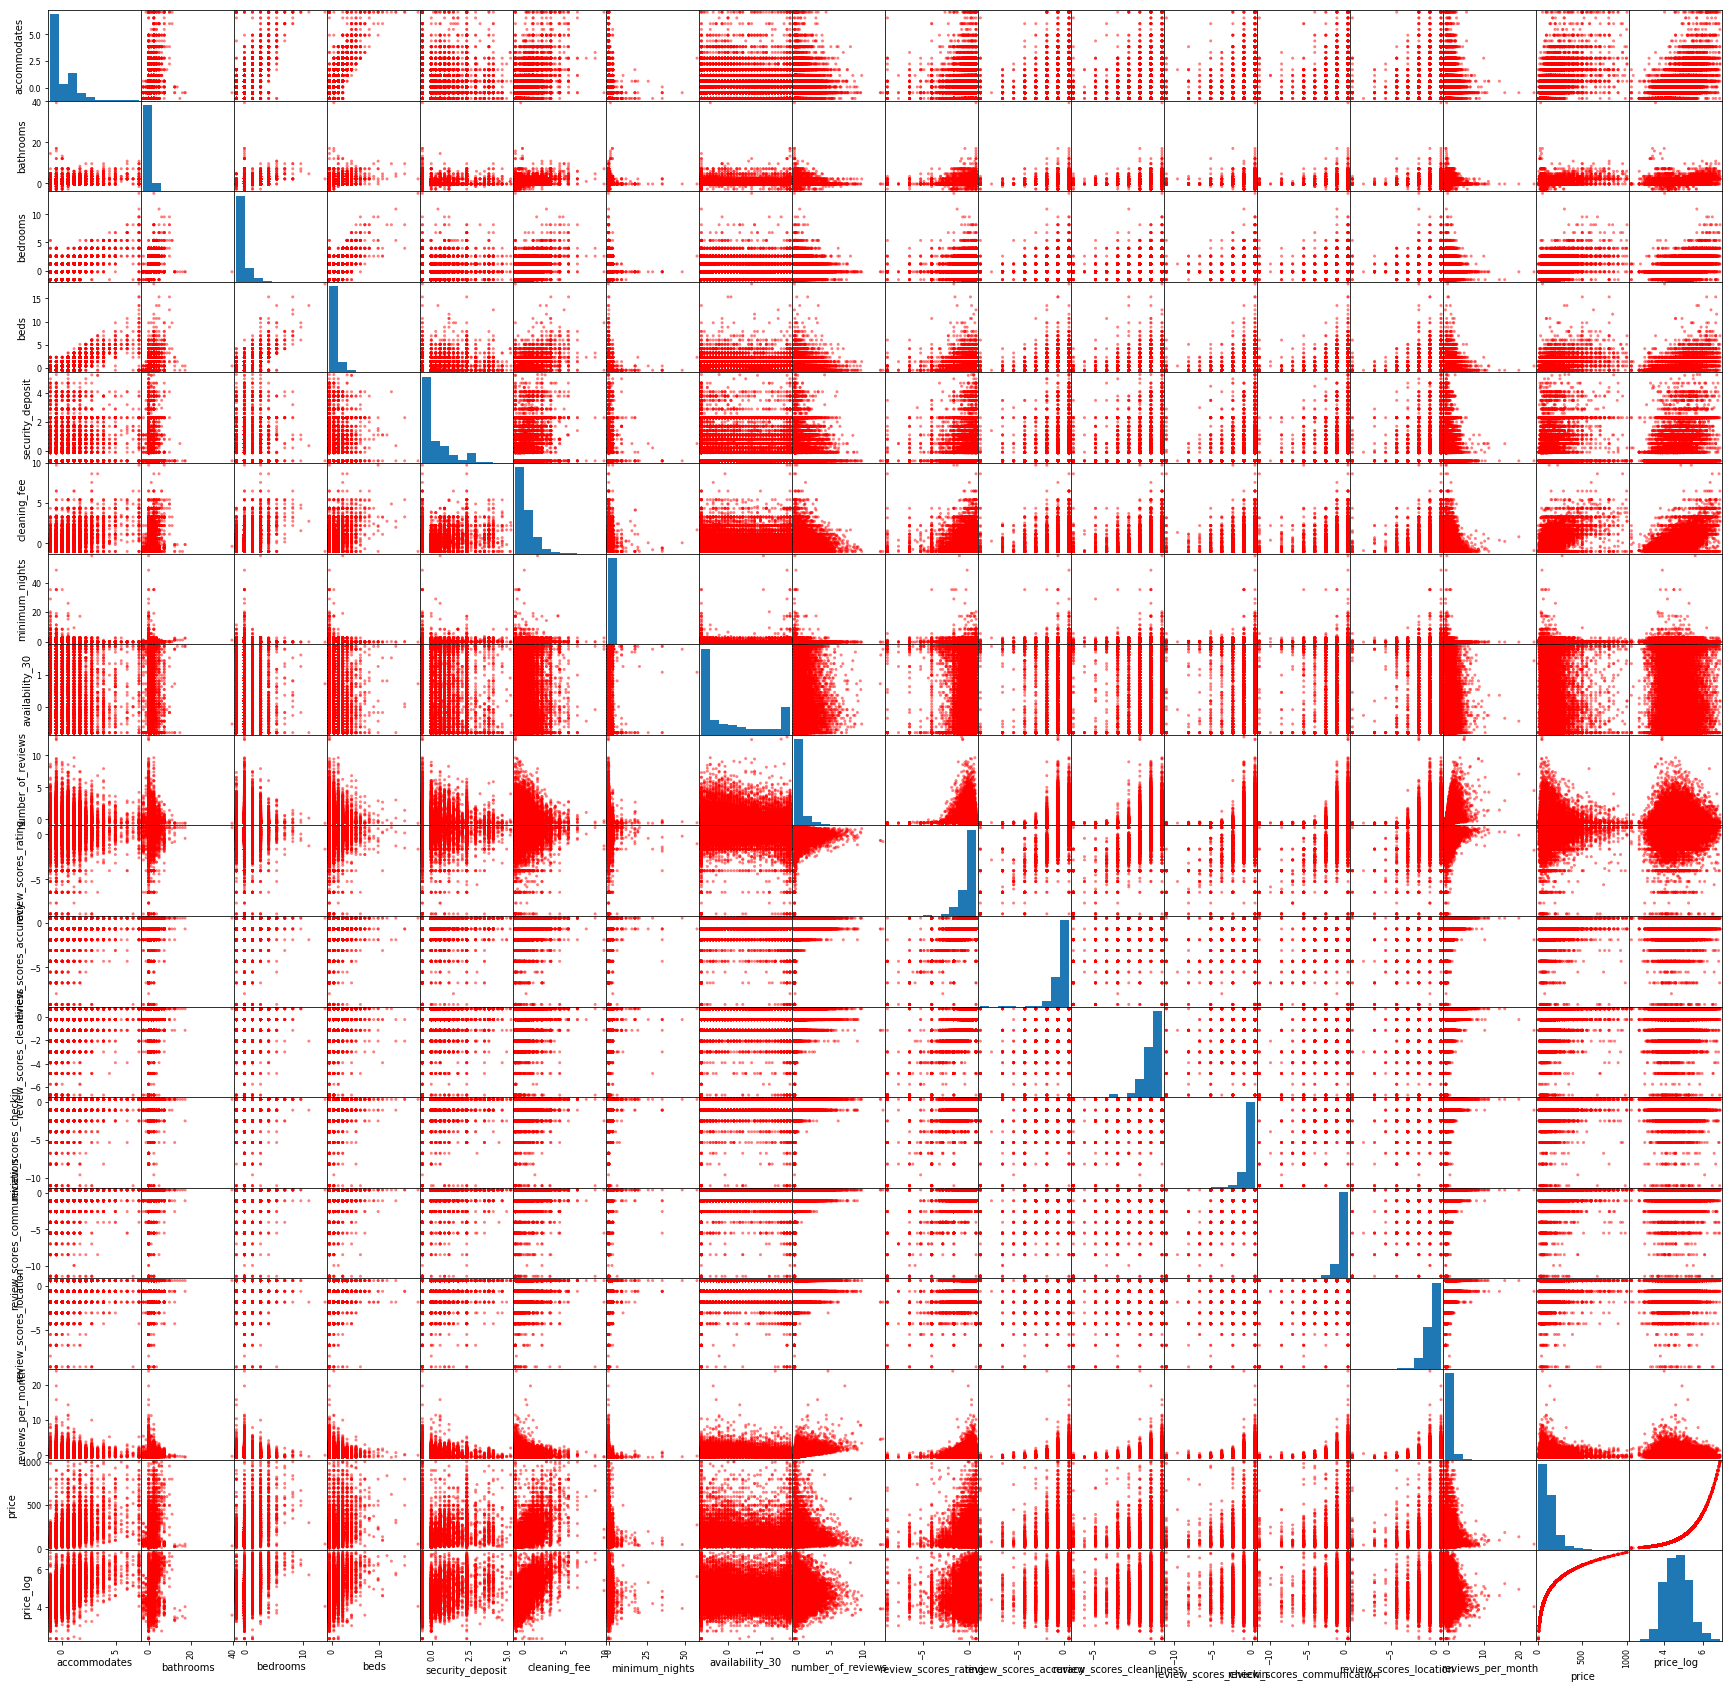

In [56]:
# check for collinearity and visualize relationship between each predictor and price
matrix_cols = ['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee',
                'minimum_nights','availability_30','number_of_reviews','review_scores_rating',
                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location','reviews_per_month',
               'price', 'price_log'
              ]
axs = scatter_matrix(df[matrix_cols], figsize=(30, 30), c='red')